# Do you want to know why you lose hair?

## 📖 Background
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## 💾 The data

The survey provides the information you need in the `Predict Hair Fall.csv` in the `data` folder.

#### Data contains information on persons in this survey. Each row represents one person.
- "Id" - A unique identifier for each person.
- "Genetics" - Whether the person has a family history of baldness.
- "Hormonal Changes" - Indicates whether the individual has experienced hormonal changes (Yes/No).
- "Medical Conditions" - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- "Medications & Treatments" - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- "Nutritional Deficiencies" - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- "Stress" - Indicates the stress level of the individual (Low/Moderate/High).
- "Age" - Represents the age of the individual.
- "Poor Hair Care Habits" - Indicates whether the individual practices poor hair care habits (Yes/No).
- "Environmental Factors" - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- "Smoking" - Indicates whether the individual smokes (Yes/No).
- "Weight Loss" - Indicates whether the individual has experienced significant weight loss (Yes/No).
- "Hair Loss" - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

## 💪 Competition challenge

Choose your difficulty level! You decide how challenging this competition will be. Every level will have an equal chance to win!

### Level 1: Descriptive statistics:
1. What is the average age? What is the age distribution?
2. Which medical conditions are the most common? How often do they occur?
3. What types of nutritional deficiencies are there and how often do they occur?

### Level 2: Visualization:

1. What is the proportion of patients with hair loss in different age groups?
2. What factors are associated with hair loss? 
3. What does hair loss look like under different stress levels? 

### Level 3: Machine learning:

1. A classification model can be built to predict whether an individual will suffer from hair loss based on given factors.
2. Use cluster analysis to explore whether there are different types of hair loss groups in the data set.
3. Use algorithms such as decision trees or random forests to identify the key factors that best predict hair loss.

# 1. Plan

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sqlalchemy.dialects.mssql.information_schema import columns
from ydata_profiling import ProfileReport

In [49]:
# Import data
data = pd.read_csv('data/Predict Hair Fall.csv')
data.head(10)

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
6,169255,Yes,Yes,No Data,No Data,Selenium deficiency,High,40,Yes,No,No,No,1
7,112032,Yes,No,Dermatosis,Chemotherapy,Omega-3 fatty acids,High,35,Yes,No,Yes,No,0
8,140785,Yes,No,Eczema,Steroids,Selenium deficiency,Moderate,19,No,No,Yes,Yes,1
9,187999,No,Yes,Ringworm,Rogaine,Magnesium deficiency,Moderate,49,Yes,Yes,Yes,No,0


In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [4]:
# Check value counts for each column
for col in data.columns:
    print(data[col].value_counts())
    print('-----------------------------------')

Id
110171    2
157627    2
172639    2
186979    2
119293    1
         ..
192709    1
113981    1
196186    1
139801    1
127183    1
Name: count, Length: 995, dtype: int64
-----------------------------------
Genetics
Yes    522
No     477
Name: count, dtype: int64
-----------------------------------
Hormonal Changes
Yes    509
No     490
Name: count, dtype: int64
-----------------------------------
Medical Conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64
-----------------------------------
Medications & Treatments
Rogaine                      116
Antidepressants              110
Steroids                     107
Heart Medication             104
Accutane                     102
Antibi

In [5]:
# Check duplicates
data.duplicated().sum()

0

In [6]:
# Because the data contains "No Data" instead of NaN, we need to review how many rows contains "No Data"
data.isin(['No Data']).sum()

Id                             0
Genetics                       0
Hormonal Changes               0
Medical Conditions           110
Medications & Treatments       2
Nutritional Deficiencies      80
Stress                         0
Age                            0
Poor Hair Care Habits          0
Environmental Factors          0
Smoking                        0
Weight Loss                    0
Hair Loss                      0
dtype: int64

# 2. Analyze

## 2.1 Univariate Analysis

In [7]:
# Define a function to plot categorical data
def plot_categorical(data, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')
    plt.title(f'{col} distribution')
    plt.show()

In [8]:
data.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


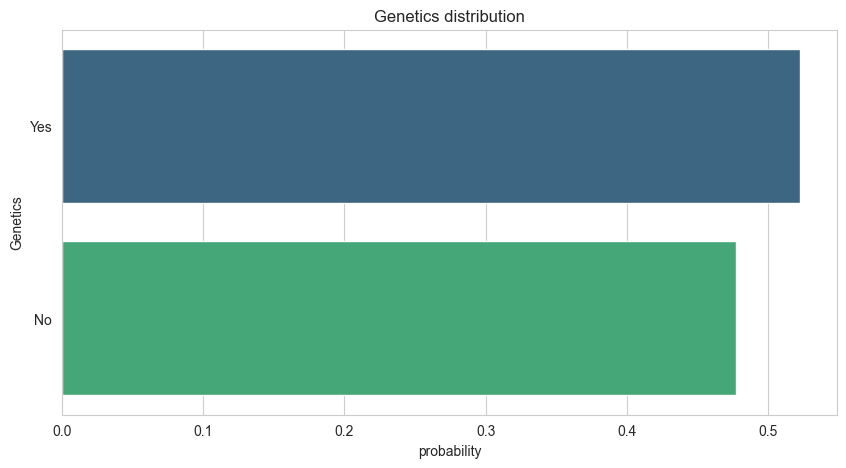

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


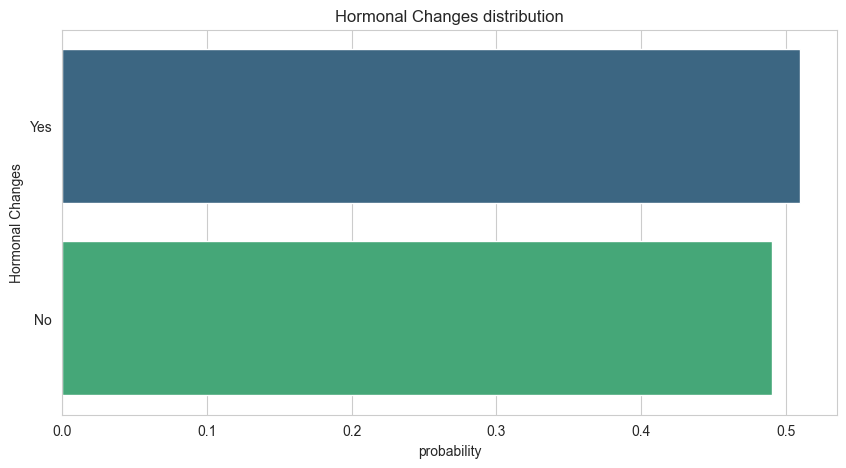

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


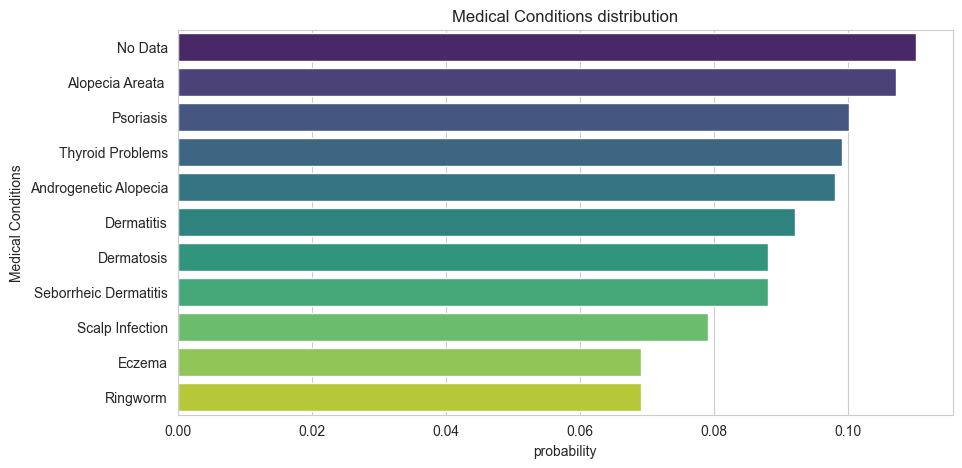

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


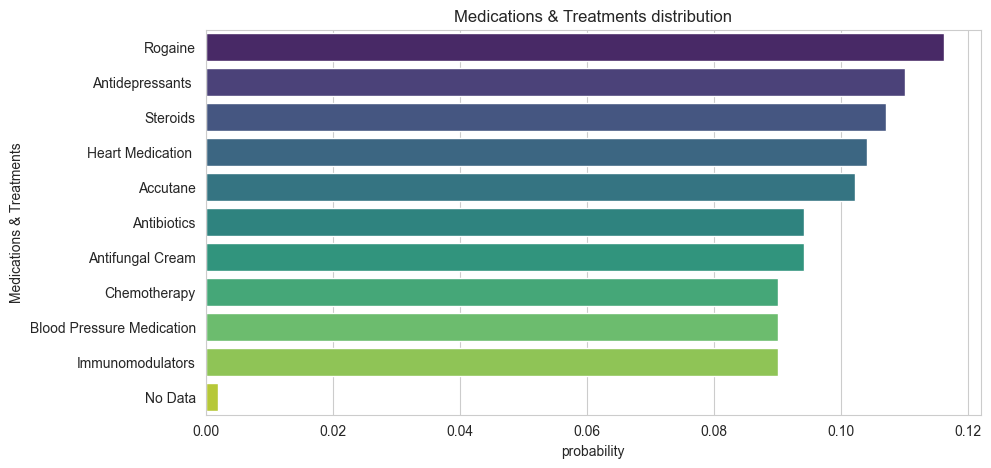

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


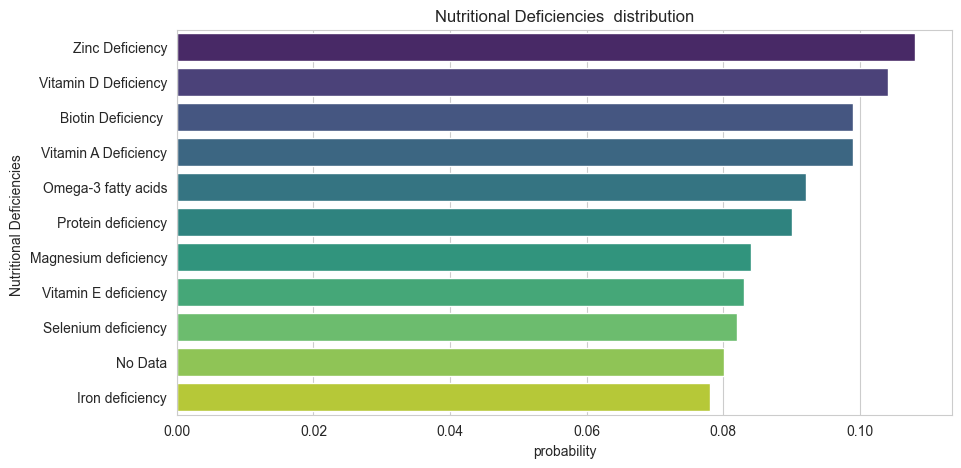

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


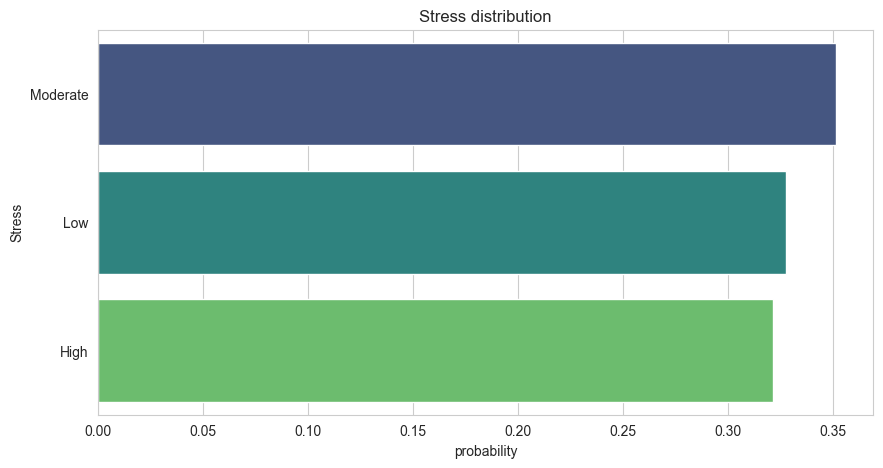

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


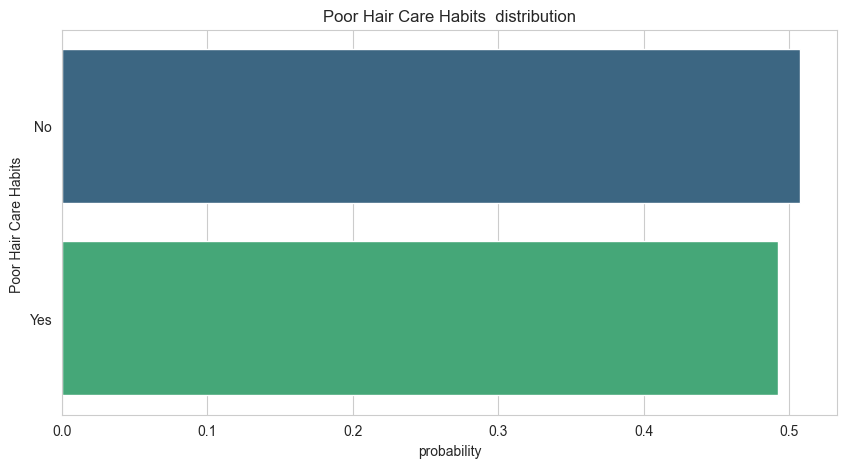

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


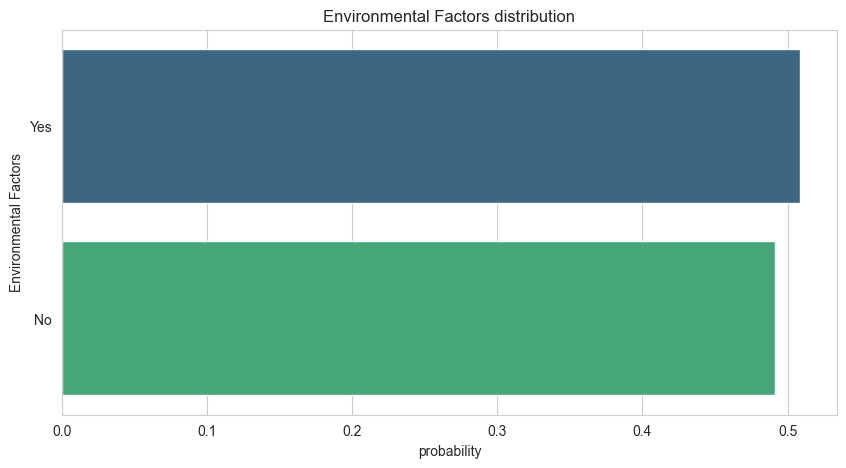

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


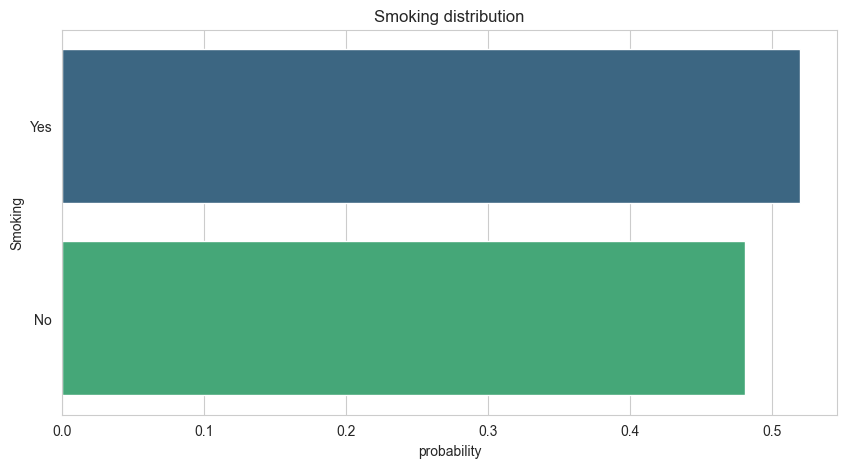

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


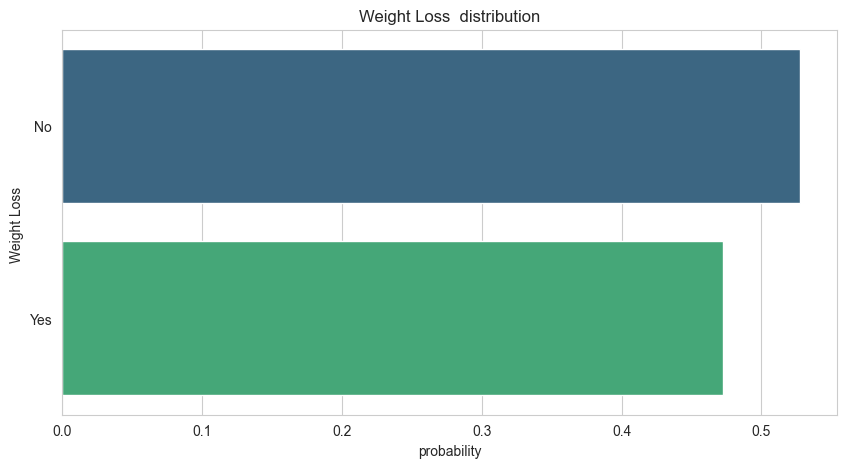

In [9]:
# Value counts for categorical columns
categorical_cols = ['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking', 'Weight Loss ']
for col in categorical_cols:
    plot_categorical(data, col)

## 2.2 Bivariate Analysis

In [10]:
# Filter out when Hair Loss is 1
data_hair_loss = data[data['Hair Loss'] == 1]
data_hair_loss.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
6,169255,Yes,Yes,No Data,No Data,Selenium deficiency,High,40,Yes,No,No,No,1
8,140785,Yes,No,Eczema,Steroids,Selenium deficiency,Moderate,19,No,No,Yes,Yes,1
11,159158,No,Yes,Alopecia Areata,Accutane,Zinc Deficiency,High,48,No,No,No,No,1


C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


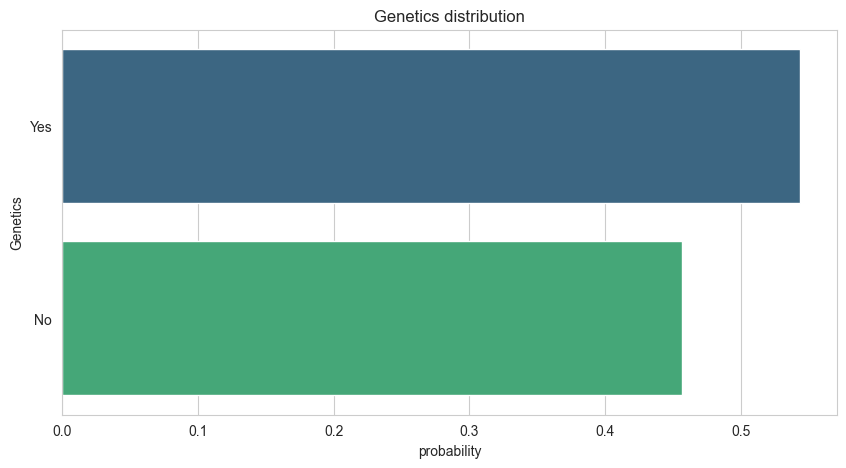

In [11]:
# Plot Genetics
plot_categorical(data_hair_loss, 'Genetics')

- The majority of people have a family history of baldness.

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


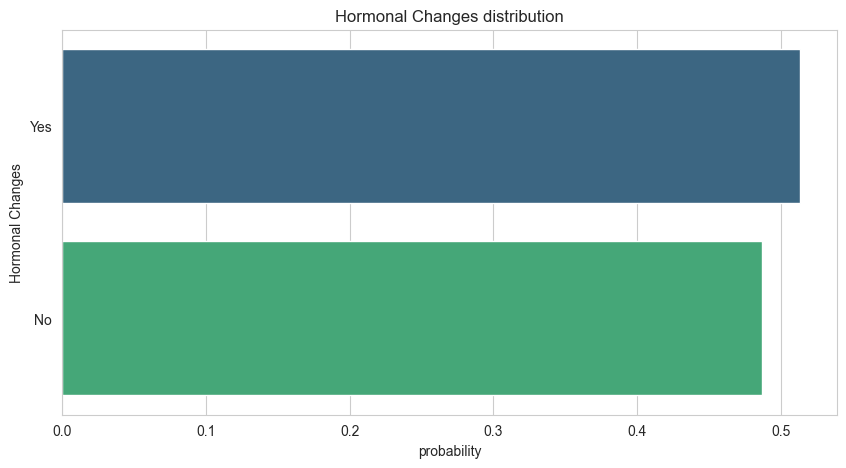

In [12]:
# Plot Hormonal Changes
plot_categorical(data_hair_loss, 'Hormonal Changes')

- Most people have experienced minor hormonal changes.

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


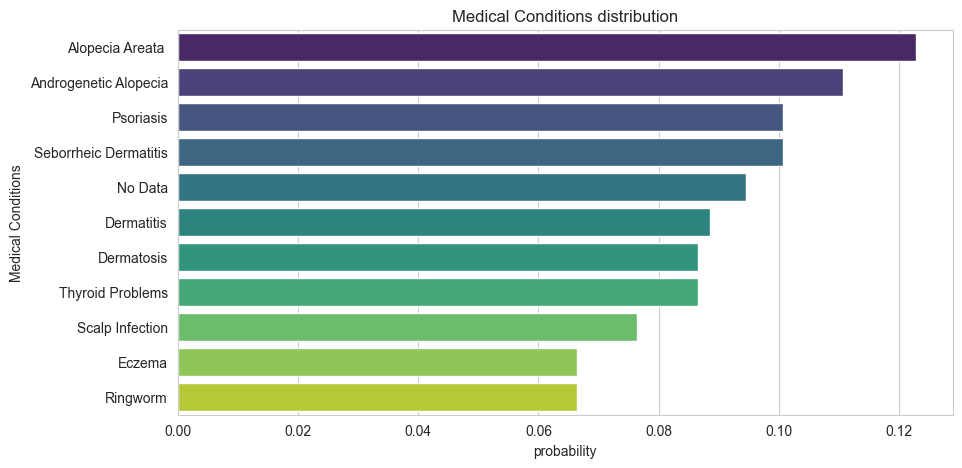

In [13]:
# Plot Medical Conditions
plot_categorical(data_hair_loss, 'Medical Conditions')

- Alopecia areata is the most common medical condition with 13%.

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


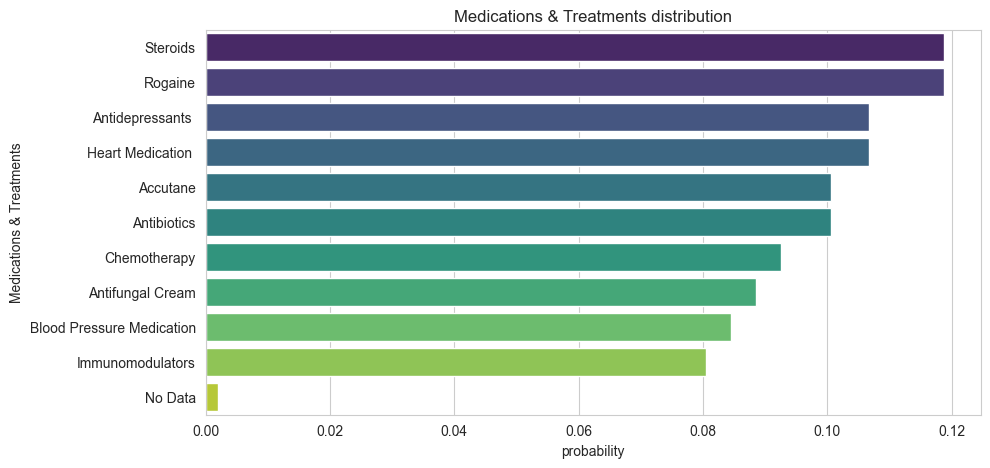

In [14]:
# Plot Medications & Treatments
plot_categorical(data_hair_loss, 'Medications & Treatments')

In [15]:
data_hair_loss.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


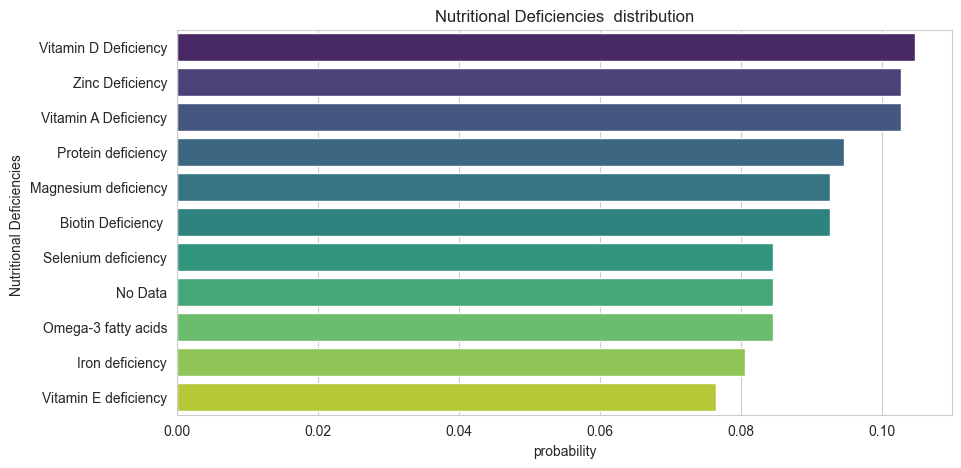

In [16]:
# Plot Nutritional Deficiencies
plot_categorical(data_hair_loss, 'Nutritional Deficiencies ')

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


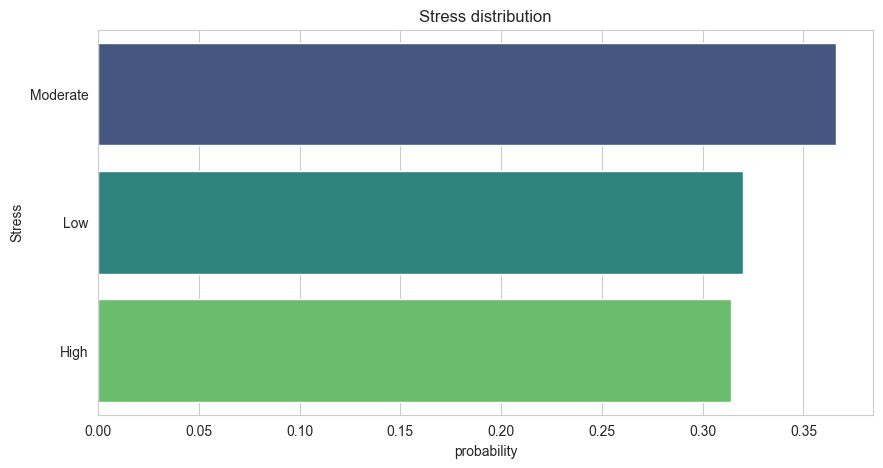

In [17]:
# Plot Stress
plot_categorical(data_hair_loss, 'Stress')

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


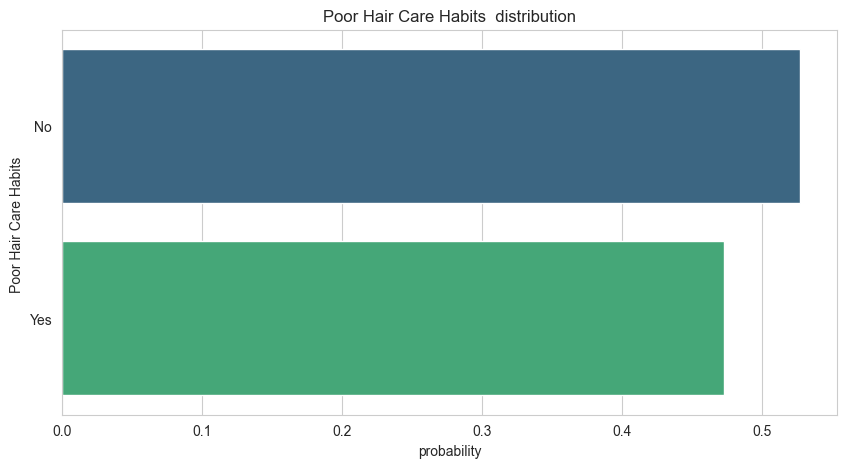

In [18]:
# Plot Poor Hair Care Habits
plot_categorical(data_hair_loss, 'Poor Hair Care Habits ')

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


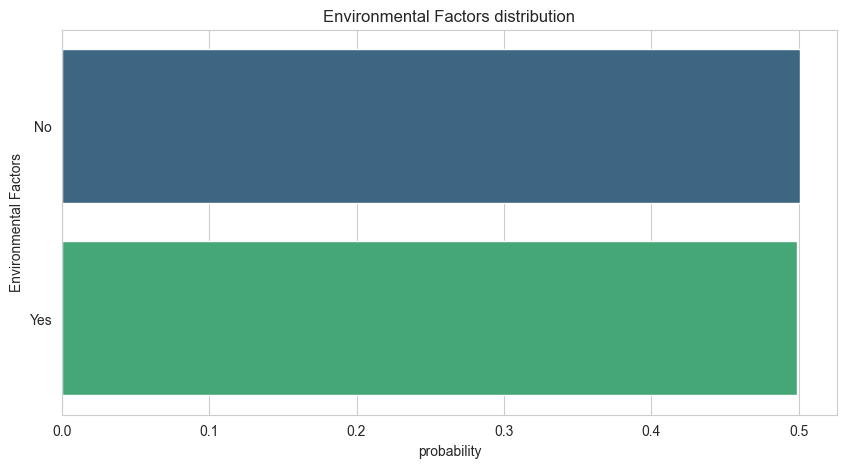

In [19]:
# Plot Environmental Factors
plot_categorical(data_hair_loss, 'Environmental Factors')

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


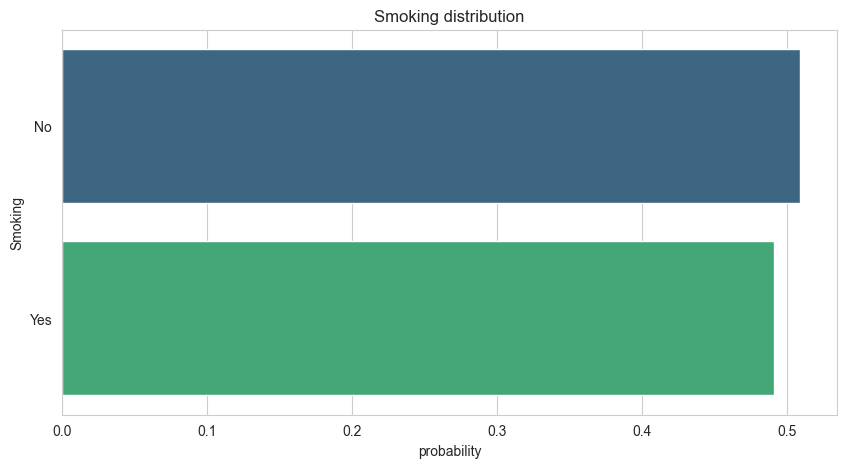

In [20]:
# Plot Smoking
plot_categorical(data_hair_loss, 'Smoking')

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\45176670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis', order=data[col].value_counts().index, stat='probability')


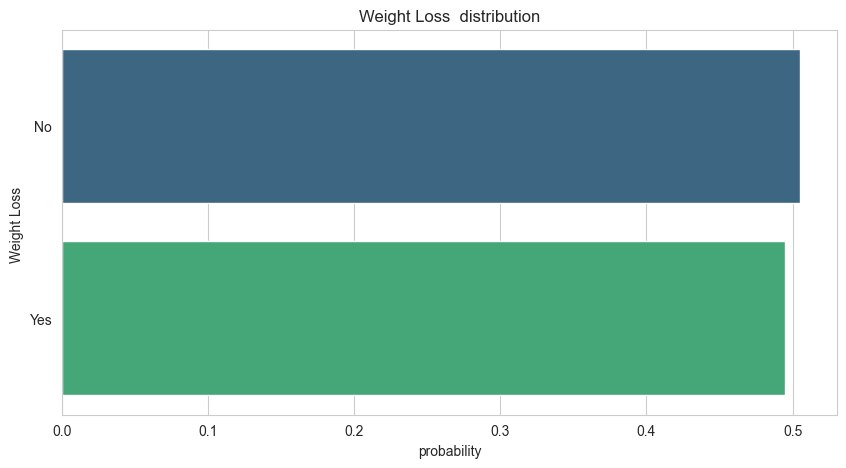

In [21]:
# Plot Weight Loss
plot_categorical(data_hair_loss, 'Weight Loss ')

In [22]:
data_hair_loss.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

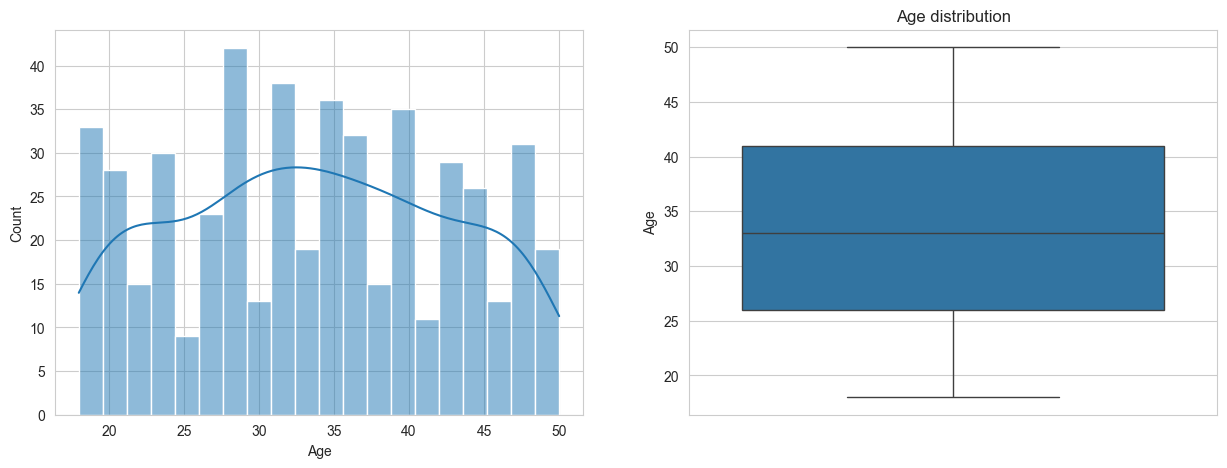

In [23]:
# Plot Age
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_hair_loss['Age'], bins=20, kde=True, ax=ax[0])
sns.boxplot(data_hair_loss['Age'], ax=ax[1])
plt.title('Age distribution')
plt.show()

### Initial key findings
1. The average age of people with hair loss is around 33 years old, mostly 28. The age distribution is uniform.
2. The most common medical condition is alopecia areata, which accounts for 13%.
3. The most common nutritional deficiency is vitamin D deficiency, which accounts for 13%.

### What is the proportion of patients with hair loss in different age groups?

In [24]:
# Devide age into groups
data_hair_loss['Age Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50], labels=['0-20', '21-30', '31-40', '41-50'])

C:\Users\QKmd\AppData\Local\Temp\ipykernel_61680\2966891757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hair_loss['Age Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50], labels=['0-20', '21-30', '31-40', '41-50'])


In [25]:
# Group by Age Groups
data_hair_loss['Age Group'].value_counts(normalize=True)

Age Group
31-40    0.352113
21-30    0.297787
41-50    0.259557
0-20     0.090543
Name: proportion, dtype: float64

- The proportion of hair loss patients in the 31-40 age group is the highest, accounting for 35%.

### What does hair loss look like under different stress levels?

<Axes: xlabel='Stress'>

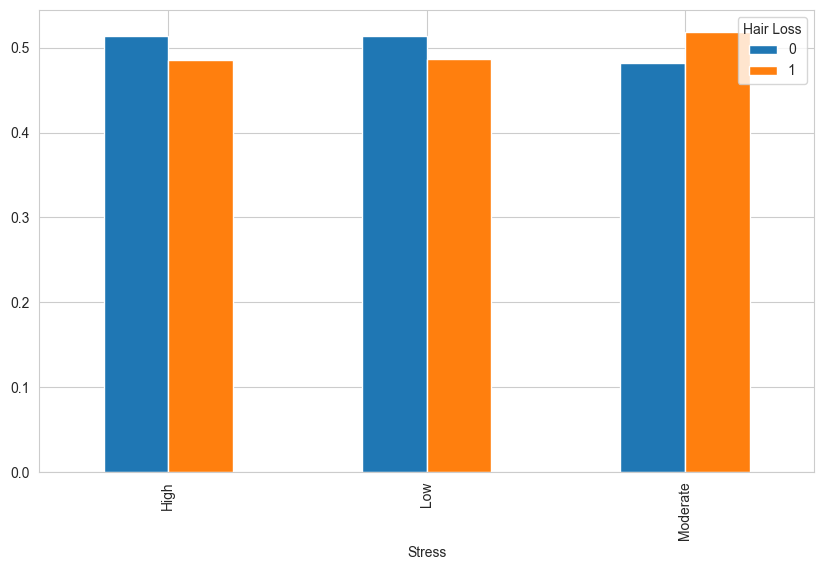

In [26]:
# Plot Stress vs Hair Loss using stacked bar chart
data.groupby('Stress')['Hair Loss'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=False, figsize=(10, 6))

- The proportion of hair loss patients is higher under moderate stress levels.
- Hypothesis: Is there different types of hair loss groups in the data set?
    - H0: There is no difference between hair loss groups.
    - H1: There are different types of hair loss groups in the data set.

In [27]:
# Test hypothesis
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Stress'], data['Hair Loss'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
p

0.6198599930985773

- p-value is greater than 0.05, so we fail to reject the null hypothesis. There is no difference between hair loss groups in terms of stress levels.

In [28]:
# Test hypothesis for other factors
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Hair Loss'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'{col}: {p}')

Genetics: 0.21412303866996626
Hormonal Changes: 0.8719100031066214
Medical Conditions: 0.45711419686494104
Medications & Treatments: 0.9604391135042174
Nutritional Deficiencies : 0.96974477918253
Stress: 0.6198599930985773
Poor Hair Care Habits : 0.24073549493781138
Environmental Factors: 0.5924780802381315
Smoking: 0.08268912552440279
Weight Loss : 0.17579358375861517


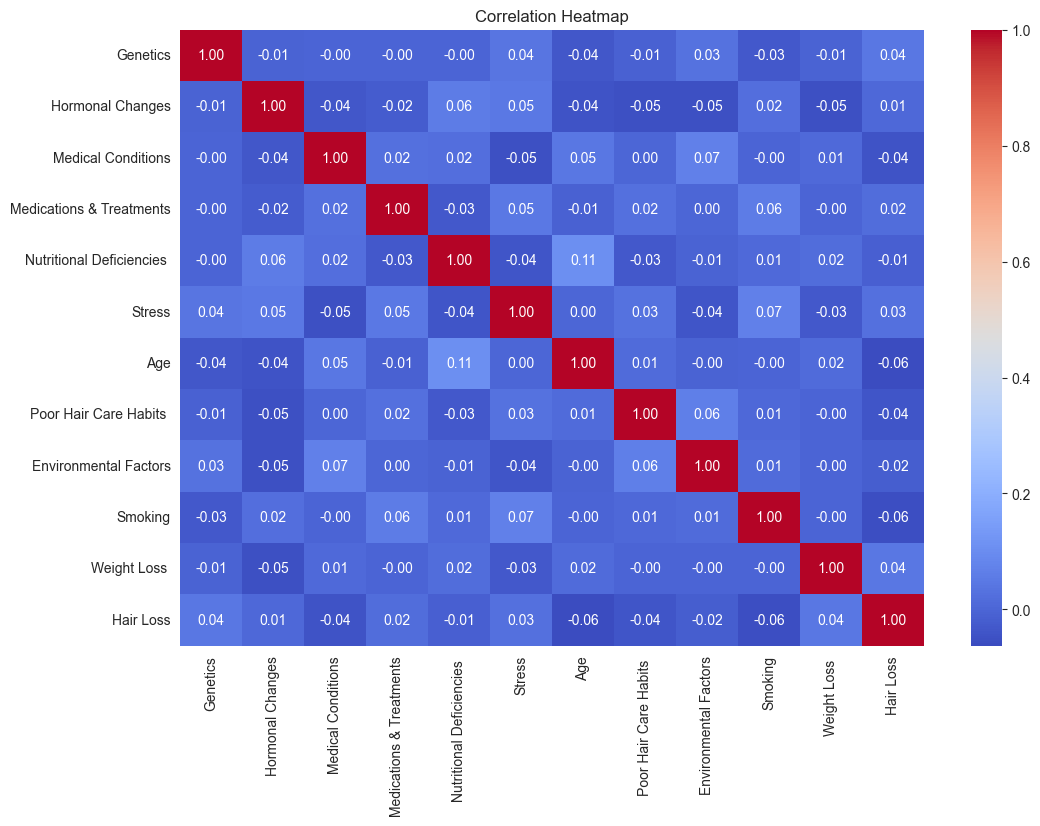

In [86]:
# Transform categorical variables to numerical then create a heatmap
le = LabelEncoder()
data_encoded = data.copy()
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])
    
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.drop(columns='Id', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [51]:
# Because the p-value is greater than 0.05 for all factors, we fail to reject the null hypothesis for all factors.
# The heatmap shows that there is no strong correlation between the factors and hair loss.
# We need to feature selection to identify the key factors that best predict hair loss.
def analyze_and_engineer_features(df):
    """
    Analyze and engineer features for the hair loss dataset
    """
    # Create a copy to avoid modifying original data
    df_processed = df.copy()
    
    # 1. Age-related features
    df_processed['Age_Bucket'] = pd.qcut(df_processed['Age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Elderly'])
    df_processed['Is_Prime_Hair_Loss_Age'] = ((df_processed['Age'] >= 20) & (df_processed['Age'] <= 40)).astype(int)
    
    # 2. Create risk score features
    # Medical risk score (excluding nutritional deficiencies)
    df_processed['Medical_Risk_Score'] = (
        (df_processed['Medical Conditions'].notna() & (df_processed['Medical Conditions'] != 'No Data')).astype(int) +
        (df_processed['Medications & Treatments'].notna() & (df_processed['Medications & Treatments'] != 'No Data')).astype(int)
    )
    
    # Lifestyle risk score
    df_processed['Lifestyle_Risk_Score'] = (
        (df_processed['Smoking'] == 'Yes').astype(int) +
        (df_processed['Poor Hair Care Habits '] == 'Yes').astype(int) +
        (df_processed['Environmental Factors'] == 'Yes').astype(int) +
        (df_processed['Weight Loss '] == 'Yes').astype(int)
    )
    
    # 3. Stress level encoding
    stress_map = {'Low': 0, 'Moderate': 1, 'High': 2}
    df_processed['Stress_Level_Encoded'] = df_processed['Stress'].map(stress_map)
    
    # 4. Combined risk factors
    df_processed['Total_Risk_Score'] = (
        df_processed['Medical_Risk_Score'] +
        df_processed['Lifestyle_Risk_Score'] +
        df_processed['Stress_Level_Encoded'] +
        (df_processed['Genetics'] == 'Yes').astype(int) * 2  # Giving genetics more weight
    )
    
    # 5. Create interaction features
    df_processed['Genetics_Stress'] = ((df_processed['Genetics'] == 'Yes') & 
                                     (df_processed['Stress'] == 'High')).astype(int)
    df_processed['Age_Genetics'] = ((df_processed['Is_Prime_Hair_Loss_Age'] == 1) & 
                                  (df_processed['Genetics'] == 'Yes')).astype(int)
    
    # 6. Create hormone-related interactions
    df_processed['Hormonal_Medical'] = ((df_processed['Hormonal Changes'] == 'Yes') & 
                                      (df_processed['Medical_Risk_Score'] > 0)).astype(int)
    
    # Calculate feature importance using mutual information
    categorical_cols = ['Genetics', 'Hormonal Changes', 'Smoking', 'Poor Hair Care Habits ', 
                       'Environmental Factors', 'Weight Loss ', 'Nutritional Deficiencies ']
    
    # Encode categorical variables for importance calculation
    df_encoded = df_processed.copy()
    le = LabelEncoder()
    for col in categorical_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    
    feature_cols = ['Age', 'Medical_Risk_Score', 'Lifestyle_Risk_Score', 'Stress_Level_Encoded',
                   'Total_Risk_Score', 'Genetics_Stress', 'Age_Genetics', 
                   'Hormonal_Medical'] + categorical_cols
    
    importance_scores = mutual_info_classif(df_encoded[feature_cols], df_encoded['Hair Loss'])
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': importance_scores
    }).sort_values('Importance', ascending=False)
    
    return df_processed, feature_importance

In [52]:
def plot_feature_importance(feature_importance):
    """
    Plot feature importance scores
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Feature Importance for Hair Loss Prediction')
    plt.tight_layout()
    return plt

In [53]:
data.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [54]:
df_processed, feature_importance = analyze_and_engineer_features(data)

# View the most important features
print(feature_importance)

                      Feature  Importance
0                         Age    0.028960
6                Age_Genetics    0.025935
11     Poor Hair Care Habits     0.017120
10                    Smoking    0.009791
12      Environmental Factors    0.009727
2        Lifestyle_Risk_Score    0.006257
4            Total_Risk_Score    0.005908
9            Hormonal Changes    0.004936
1          Medical_Risk_Score    0.003867
5             Genetics_Stress    0.000696
3        Stress_Level_Encoded    0.000000
7            Hormonal_Medical    0.000000
8                    Genetics    0.000000
13               Weight Loss     0.000000
14  Nutritional Deficiencies     0.000000


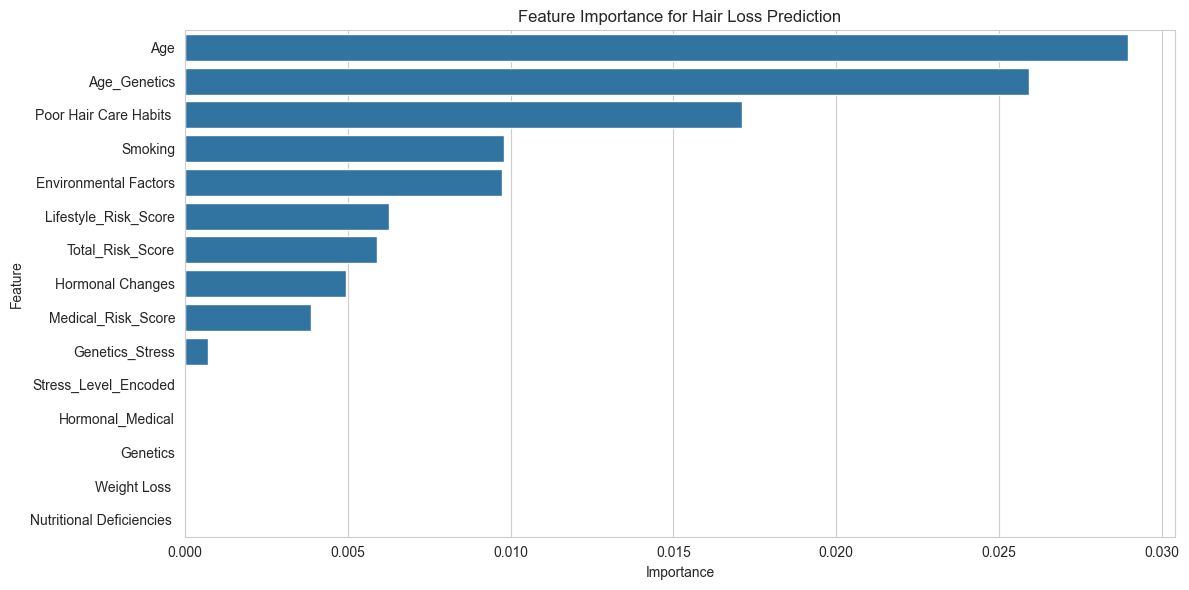

In [63]:
plot_feature_importance(feature_importance)
plt.show()

In [40]:
def analyze_categorical_relationships(df):
    """
    Analyze relationships between categorical variables and hair loss
    """
    categorical_cols = ['Genetics', 'Hormonal Changes', 'Nutritional Deficiencies ', 
                       'Smoking', 'Poor Hair Care Habits ', 'Environmental Factors', 
                       'Weight Loss ', 'Stress']
    
    results = {}
    for col in categorical_cols:
        cross_tab = pd.crosstab(df[col], df['Hair Loss'])
        percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        results[col] = percentages
    
    return results

In [41]:
categorical_analysis = analyze_categorical_relationships(data)
print("\nCategorical Variable Relationships with Hair Loss:")
for var, value in categorical_analysis.items():
    print(f"\n{var}:")
    print(value)


Categorical Variable Relationships with Hair Loss:

Genetics:
Hair Loss          0          1
Genetics                       
No         52.410901  47.589099
Yes        48.275862  51.724138

Hormonal Changes:
Hair Loss                 0          1
Hormonal Changes                      
No                50.612245  49.387755
Yes               49.901768  50.098232

Nutritional Deficiencies :
Hair Loss                          0          1
Nutritional Deficiencies                       
Biotin Deficiency          53.535354  46.464646
Iron deficiency            48.717949  51.282051
Magnesium deficiency       45.238095  54.761905
No Data                    47.500000  52.500000
Omega-3 fatty acids        54.347826  45.652174
Protein deficiency         47.777778  52.222222
Selenium deficiency        48.780488  51.219512
Vitamin A Deficiency       48.484848  51.515152
Vitamin D Deficiency       50.000000  50.000000
Vitamin E deficiency       54.216867  45.783133
Zinc Deficiency            52.

In [58]:
df_processed_sub = df_processed.drop(columns=['Id', 'Hair Loss'], axis=1)

In [59]:
# Create cross-tabulation for the selected features with hair loss
for col in df_processed_sub.columns:
    cross_tab = pd.crosstab(df_processed_sub[col], df_processed['Hair Loss'])
    percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    print(f"\n{col}:")
    print(percentages)


Genetics:
Hair Loss          0          1
Genetics                       
No         52.410901  47.589099
Yes        48.275862  51.724138

Hormonal Changes:
Hair Loss                 0          1
Hormonal Changes                      
No                50.612245  49.387755
Yes               49.901768  50.098232

Medical Conditions:
Hair Loss                      0          1
Medical Conditions                         
Alopecia Areata        42.990654  57.009346
Androgenetic Alopecia  43.877551  56.122449
Dermatitis             52.173913  47.826087
Dermatosis             51.136364  48.863636
Eczema                 52.173913  47.826087
No Data                57.272727  42.727273
Psoriasis              50.000000  50.000000
Ringworm               52.173913  47.826087
Scalp Infection        51.898734  48.101266
Seborrheic Dermatitis  43.181818  56.818182
Thyroid Problems       56.565657  43.434343

Medications & Treatments:
Hair Loss                          0          1
Medications & Trea

In [60]:
# Using chi-square test to determine the relationship between the selected features and hair loss
def chi_square_test(df, feature):
    """
    Perform a chi-square test for independence between the feature and hair loss
    """
    cross_tab = pd.crosstab(df[feature], df['Hair Loss'])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    return chi2, p

Hypothesis:
- H0: There is no relationship between the selected features and hair loss.
- H1: There is a relationship between the selected features and hair loss.

In [61]:
# Perform chi-square test for the selected features
for col in df_processed_sub.columns:
    chi2, p = chi_square_test(df_processed, col)
    print(f"{col}: p-value = {p}")

Genetics: p-value = 0.21412303866996626
Hormonal Changes: p-value = 0.8719100031066214
Medical Conditions: p-value = 0.45711419686494104
Medications & Treatments: p-value = 0.9604391135042174
Nutritional Deficiencies : p-value = 0.96974477918253
Stress: p-value = 0.6198599930985773
Age: p-value = 0.329590449093802
Poor Hair Care Habits : p-value = 0.24073549493781138
Environmental Factors: p-value = 0.5924780802381315
Smoking: p-value = 0.08268912552440279
Weight Loss : p-value = 0.17579358375861517
Age_Bucket: p-value = 0.1429573757678196
Is_Prime_Hair_Loss_Age: p-value = 0.012136140724984533
Medical_Risk_Score: p-value = 0.28916502097497254
Lifestyle_Risk_Score: p-value = 0.07439209986567667
Stress_Level_Encoded: p-value = 0.6198599930985773
Total_Risk_Score: p-value = 0.7889144996999163
Genetics_Stress: p-value = 0.6155896205079631
Age_Genetics: p-value = 0.00798759515360906
Hormonal_Medical: p-value = 0.9222315564167027


- So there are two key factors that best predict hair loss: Age_Genetics and Is_Prime_Hair_Loss_Age.

In [71]:
df_processed.groupby('Is_Prime_Hair_Loss_Age')['Hair Loss'].value_counts(normalize=True)

Is_Prime_Hair_Loss_Age  Hair Loss
0                       0            0.556164
                        1            0.443836
1                       1            0.528391
                        0            0.471609
Name: proportion, dtype: float64

In [72]:
df_processed.groupby('Age_Genetics')['Hair Loss'].value_counts(normalize=True)

Age_Genetics  Hair Loss
0             0            0.533333
              1            0.466667
1             1            0.557522
              0            0.442478
Name: proportion, dtype: float64

- The proportion of hair loss patients is higher in the prime hair loss age group.
- The proportion of hair loss patients is higher in the genetics group.

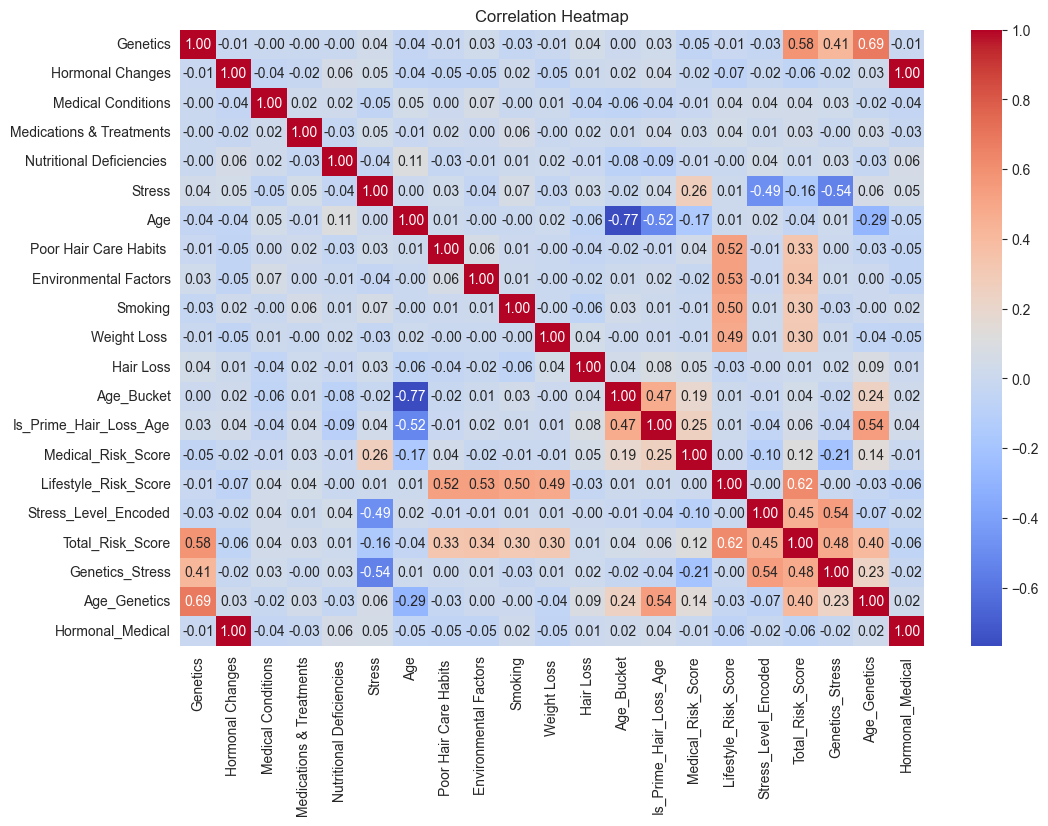

In [87]:
# Transform categorical variables to numerical then create a heatmap
le = LabelEncoder()
data_encoded = df_processed.copy()
for col in df_processed.columns:
    data_encoded[col] = le.fit_transform(data_encoded[col])
    
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.drop(columns='Id', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Finally, we can see that there is a strong correlation between Age_Genetics and Is_Prime_Hair_Loss_Age.
- But we choose to keep Age_Genetics.

### What factors are associated with hair loss?
So we can answer the question: "What factors are associated with hair loss?"
- The key factors that best predict hair loss are Age_Genetics and Is_Prime_Hair_Loss_Age.
- The proportion of hair loss patients is higher in the prime hair loss age group and the genetics group.
- There is no strong correlation between the factors and hair loss.

In [88]:
# Final data
df_final = df_processed[['Age_Genetics', 'Lifestyle_Risk_Score', 'Total_Risk_Score', 'Hormonal Changes', 'Medical_Risk_Score', 'Genetics_Stress', 'Hair Loss']]
df_final.head()

,Age_Genetics,Lifestyle_Risk_Score,Total_Risk_Score,Hormonal Changes,Medical_Risk_Score,Genetics_Stress,Hair Loss
0,0,2,5,No,0,0,0
1,0,2,6,No,2,0,0
2,0,3,6,No,2,0,0
3,0,2,7,Yes,2,0,0
4,0,2,5,No,2,0,1
